Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Robert Blaauwendraad"
STUDENT_NUMBER = "s1084960"
COLLABORATOR_NAME = "Daniel Schenk"
COLLABORATOR_STUDENT_NUMBER = "s1073827"

---

## **Important:** When handing in your homework:
+ Hand in the notebook (and nothing else) **named as follows**: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ Use the Brightspace discussion board or email the student assistants for questions on how to complete the exercises.
+ If you find mistakes/have suggestions/would like to complain about the assigment material itself, please email me [Olivier] at `Olivier.Claessen@ru.nl`
+ Do not remove any cells in the notebook, else this might break the auto-grading system. **An invalid notebook will mean a severe reduction in your grade!**
+ Many online collaboration platforms remove metadata from notebooks, which breaks the auto-grading system. Again, **An invalid notebook will mean a severe reduction in your grade!**. Should you wish to use these platforms, copy the answers from the online notebook to one running on your own machine with Anaconda, and then execute all cells.
+ Only type your answers in those places where they are asked.
+ Remove any "raise NotImplementedError()" statements in the cells you answered.

# Assignment 5: Anomaly Detection

## Learning Goals
At the end of this practical:
- You apply Isolation Forests and LOF to simple data.
- You visualize the scores resulting from anomaly detection.
- You interpret the output of anomaly detection algorithms.
- You describe when algorithms fail and which other algorithms might be suitable.
- You can optimize hyperparameters in the active learning setting.
- You can describe why and how the initial algorithm application is important.


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, Chapter 9.



##  5.1 Basic anomaly detection
In this section, we'll allow you to get acquainted with the basics of anomaly detection. We'll use some of the basic algorithms contained in Scikit-learn for initial analysis.




#### 5.1.1

(0.5 pts) Load the data from `anomaly_1.npz`. This is a numpy zip format. Read the documention on how this format works. Save the data and labels to variables called `X_1` and `y_1` respectively.

In [6]:
##Answer to question 5.1.1
from numpy import load
data = load('data/anomaly_1')
list(data.keys())

X_1 = data['X']
y_1 = data['y']


In [7]:
"""Checks whether 5.1.1 output is correct"""
"""DO NOT MODIFY THIS CELL"""

'DO NOT MODIFY THIS CELL'

#### 5.1.2
(1.0 pts) Plot the data in `X_1`. Colour the points based on the label in `y_1`. Add a legend to indicate which color indicates what class. In this legend, the 0 class should be called "normal" and the 1 class should be called "anomaly".

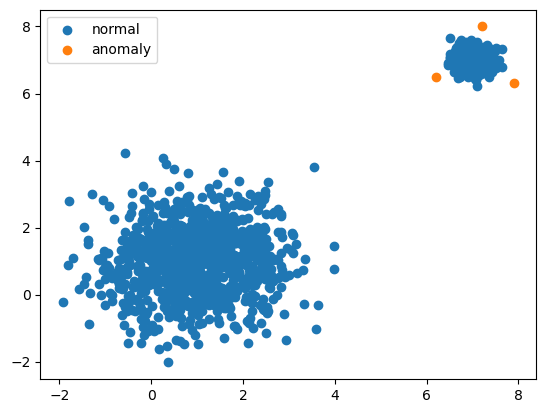

In [9]:
##Answer to question 5.1.2
import matplotlib.pyplot as plt

normal_points = X_1[y_1 == 0]
anomaly_points = X_1[y_1 == 1]

plt.scatter(normal_points[:,0], normal_points[:,1], label='normal')
plt.scatter(anomaly_points[:,0], anomaly_points[:,1], label='anomaly')
plt.legend()
plt.show()


#### 5.1.3
(1.0 pts) Now it's time to apply our first anomaly detection algorithm to the data. Remember, in **unsupervised** learning, we don't have access to labels, so we won't use the `y_1` variable just yet.
Fit the IsolationForest algorithm from Scikit-learn on this data. The default parameters will suffice, with the exception of the random state variable, which should be: `random_state=1337`.
After fitting, we won't look at the prediction, which is already binarized, but rather to the output of the `score_samples` function. Save the scores resulting from this function to a variable called `y_1_scores`.

In [13]:
##Answer to question 5.1.3
from sklearn.ensemble import IsolationForest

random_state = 1337
clf = IsolationForest(random_state=random_state)
clf.fit(X_1)
y_1_scores = clf.score_samples(X_1)


In [ ]:
"""Checks whether 5.1.3 output is correct"""
"""DO NOT MODIFY THIS CELL"""

#### 5.1.4

(0.5 pts) It's important to keep visualizing your results. Plot the `X_1` data again, but this time color the points according to the scores calculated in 5.1.3. Add a colorbar to show the numerical score corresponding to a color. A nice colormap to use is the `hot` colormap included in matplotlib.

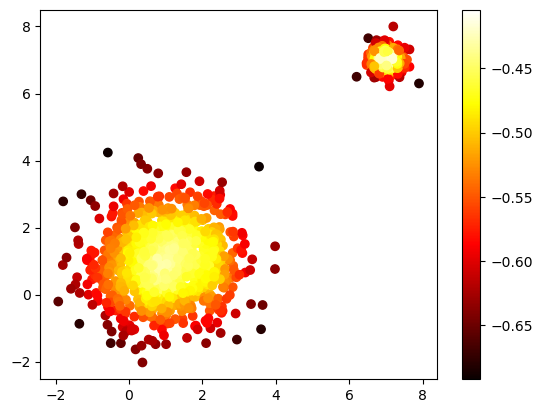

In [14]:
##Answer to question 5.1.4
import matplotlib.pyplot as plt

plt.scatter(X_1[:,0], X_1[:,1], c=y_1_scores, cmap='hot')
plt.colorbar()
plt.show()

#### 5.1.5

(1 pts) How do you think the algorithm performs? Do you observe many false positives/negatives? Explain why you think the algorithm performs well/badly.

The algorithm performs not that great, it detects quite a lot of false positives. This is because the algorithm is based on the idea that anomalies are data points that are far away from the rest of the data. However, in this case the anomalies are not far away from the rest of the data, but are just a bit different. This means that the algorithm will detect a lot of false positives, because it will detect the normal data points that are a bit different as anomalies.

#### 5.1.6

(1.5 pts) Repeat questions 5.1.3 up to and including 5.1.5, but use the `LocalOutlierFactor` method from scikit-learn instead of `IsolationForest`. 
To summarize:
1. Calculate `y_1_scores` using `LocalOutlierFactor`. (no need to set `random_state`) **Important:** in sklearn, LOF has no `score_samples` function comparable to IsolationForest. Use the `negative_outlier_factor_` attribute after fitting on `X_1` instead.
2. Plot the scores and make a color bar
3. Reflect on how the algorithm performs: "How do you think the algorithm performs? Do you observe many false positives/negatives? Explain why you think the algorithm performs well/badly."

In [15]:
##Answer to question 5.1.6.1

#Calculate the scores here
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor()
clf.fit(X_1)
y_1_scores = clf.negative_outlier_factor_


In [ ]:
"""Checks whether 5.1.6.1 output is correct"""
"""DO NOT MODIFY THIS CELL"""

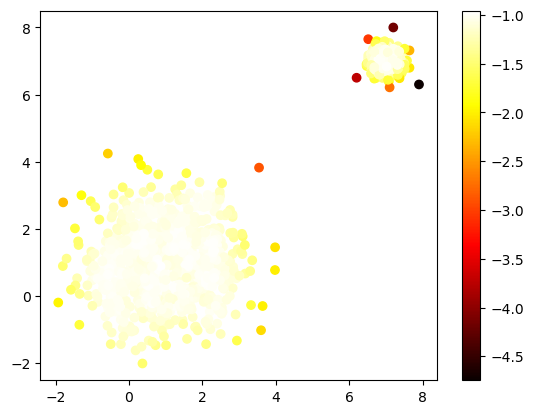

In [16]:
##Answer to question 5.1.6.2

#Make your plots here
import matplotlib.pyplot as plt

plt.scatter(X_1[:,0], X_1[:,1], c=y_1_scores, cmap='hot')
plt.colorbar()
plt.show()

This algorithm performs better than the previous one, because it detects less false positives.

## 5.2 Evaluation and Active Learning

So far, we've only done manual visual inspection of the output of our anomaly detection algorithms. In many practical use-cases, this is the only option, as we have no real labels available to us. We apply unsupervised algorithms, inspect the results, and improve our algorithm based on our findings, possibly labeling some of the (previously unlabeled) data. 
In toy examples, such as this practical, we sometmes do have labels however, and we can use these to gain some insights into how well our algorithms perform, as well as use them to replicate real-world data science practice.


#### 5.2.1 Hyperparameter tuning unsupervised algorithms

(1.0 pts) Now we're going to take a look at how we can tune hyperparameters when we only have access to a small number of labeled samples. Normally labeling is expensive, so we'll only relabel the 10% most anomalous data after an initial unsupervised anomaly detection run. Because we only get a small set of labels after the initial run, the first pass is extremely important!

We're going to load new data, specifically the `pen-local` data, and we're going to train a LOF models.


We'll train a LOF model with `k=3` and use it to calculate LOF scores. Save the scores resulting from this model to a variable called `y_penlocal_scores_3` . 

**important hint**: Anomaly scores in Scikit-learn are different from scores of other, supervised, methods. In order to input them into the average precision or ROC/AUC functions, you'll need to make sure you **change the sign** so that the most anomalous samples have the highest value.

In [18]:
##Answer to question 5.2.1
from numpy import load
data = load('data/pen-local')
list(data.keys())

X_penlocal = data['X']
y_penlocal = data['y']

from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=3)
clf.fit(X_penlocal)
y_penlocal_scores_3 = -clf.negative_outlier_factor_

In [19]:
"""Checks whether 5.2.1 output is correct"""
"""DO NOT MODIFY THIS CELL"""

'DO NOT MODIFY THIS CELL'

We're going to use the calculated scores in order to get some labels from an expert. To simulate this, we're going to use the labels belonging to the top 10% of the highest anomaly scores (672 samples) to tune the hyperparameter $k$.

To help you, we supply you with a function which selects the top 10% according to the scores.

In [27]:
import numpy as np

def select_top_10_percent(y_scores_to_sort_by, y_labels_or_scores):
    n_10_percent = int(len(y_labels_or_scores)/10.0)
    
    sort_order = np.argsort(-y_scores_to_sort_by)

    y_labels_or_scores_10_percent = y_labels_or_scores[sort_order[0:n_10_percent]]
    
    return np.squeeze(y_labels_or_scores_10_percent)

y_penlocal_3_top_10_percent = select_top_10_percent(y_penlocal_scores_3, y_penlocal)

#### 5.2.2
(2.0 pts) Now, we're going to use the small portion of labels we have to tune the hyperparameter $k$.

Now do the following:
- Make a new LOF model for $k \in \{1, 2, 3, \ldots, 20\}$ and fit it on all of `X_penlocal`.
- For each value of $k$, calculate the ROC/AUC value using only the top 10% labels.
    - In order to do this, you'll have to use the `select_top_10_percent` function again on the scores you calculated with the LOF model!
- For each value of $k$, also calculate the ROC/AUC value with **all the labels**. (We'll use this to see how well optimization on a subset works)
- Plot the ROC/AUC values belonging to the two different sets of labels as a function of $k$ and make a legend.


**hint**: You can use the `roc_auc_score` function from Scikit-learn in order to calculate the AUC.

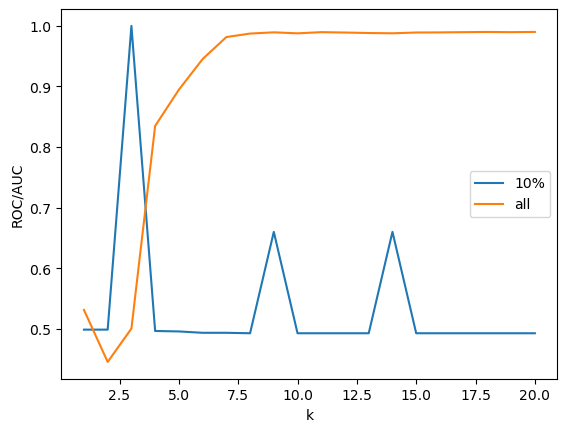

In [22]:
##Answer to question 5.2.2
from sklearn.metrics import roc_auc_score

roc_auc_scores_10_percent = []
roc_auc_scores_all = []

for k in range(1, 21):
    clf = LocalOutlierFactor(n_neighbors=k)
    clf.fit(X_penlocal)
    y_penlocal_scores = -clf.negative_outlier_factor_
    y_penlocal_scores_10_percent = select_top_10_percent(y_penlocal_scores, y_penlocal)
    roc_auc_scores_10_percent.append(roc_auc_score(y_penlocal_3_top_10_percent, y_penlocal_scores_10_percent))
    roc_auc_scores_all.append(roc_auc_score(y_penlocal, y_penlocal_scores))
    
plt.plot(range(1, 21), roc_auc_scores_10_percent, label='10%')
plt.plot(range(1, 21), roc_auc_scores_all, label='all')
plt.xlabel('k')
plt.ylabel('ROC/AUC')
plt.legend()
plt.show()

#### 5.2.3
(1.5 pts) Now answer the following questions, using code to supplement them where needed:
- What is the optimal value of $k$ when you optimize on the top 10% labels?
- What is the optimal value of $k$ when you optimize on all data?
- The optimal values of $k$ are different, can you explain why? 
- When you compare the two score graphs, why do you find the optimal values at different places? 
- Can you explain why the value of $k$ when optimized on the top 10% labels is so close to the initial guess of $k=3$? Do you think the initial guess was good?
- How close does the model optimized on the top 10% get to the best model when using all the labels? Explain in terms of ROC/AUC.

In [37]:
##Answer to question 5.2.3
# Calculate optimal k values
optimal_k_10_percent = roc_auc_scores_10_percent.index(max(roc_auc_scores_10_percent)) + 1
optimal_k_all = roc_auc_scores_all.index(max(roc_auc_scores_all)) + 1

# Calculate difference in ROC/AUC scores
roc_auc_difference = max(roc_auc_scores_all) - max(roc_auc_scores_10_percent)

print(optimal_k_10_percent)
print(optimal_k_all)
print(roc_auc_difference)


3
20
-0.009921048711455382


- The optimal value of k when optimizing on the top 10% labels is 3.
- The optimal value of k when optimizing on all data is 20.
- The optimal values of $k$ are different because the top 10% labels and all labels represent different subsets of the data. The top 10% labels represent the most anomalous data points, while all labels represent the entire dataset. Therefore, the optimal $k$ value that best separates the classes in these two subsets can be different.  
- When comparing the two score graphs, the optimal values are found at different places because the ROC/AUC scores for different $k$ values will vary depending on the subset of data (top 10% labels vs all labels) used for optimization. 
- The value of $k$ when optimized on the top 10% labels is close to the initial guess of $k=3$ because the top 10% labels are likely to be the most anomalous data points, and a smaller $k$ value is more sensitive to outliers. Therefore, a smaller $k$ value like 3 can perform well on this subset. Whether the initial guess was good or not would depend on the specific application and the trade-off between false positives and negatives. 
- The model optimized on the top 10% labels gets close to the best model when using all the labels. The difference in ROC/AUC scores is 0.0099, which is relatively small. This means that the model optimized on the top 10% labels performs almost as well as the model optimized on all the labels.
